In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Data preprocessing

In [9]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [13]:
data['ChestPainType'] = data.ChestPainType.replace({'ASY':0,'NAP':1,'ATA':2,'TA':3})

In [14]:
data['Sex'] = data.Sex.replace({'M':1,'F':0})

In [15]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
RestingECG = encoder.fit_transform(data.RestingECG)

data['RestingECG'] = pd.DataFrame(RestingECG)

In [17]:
data['ExerciseAngina'] = data.ExerciseAngina.replace({'Y':1,'N':0})

In [18]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [19]:
ST_Slope = encoder.fit_transform(data.ST_Slope)
data['ST_Slope'] = pd.DataFrame(ST_Slope)

In [20]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,1,172,0,0.0,2,0
1,49,0,1,160,180,0,1,156,0,1.0,1,1
2,37,1,2,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,1,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,2,130,236,0,0,174,0,0.0,1,1


In [64]:
data1 = data.iloc[:,[3,4,7]]
data1

,RestingBP,Cholesterol,MaxHR
0,140,289,172
1,160,180,156
2,130,283,98
3,138,214,108
4,150,195,122
...,...,...,...
913,110,264,132
914,144,193,141
915,130,131,115
916,130,236,174


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(data1)

In [70]:
data[['RestingBP','Cholesterol','MaxHR']] = pd.DataFrame(data1)

In [71]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,0.410909,0.825070,0,1,1.382928,0,0.0,2,0
1,49,0,1,1.491752,-0.171961,0,1,0.754157,0,1.0,1,1
2,37,1,2,-0.129513,0.770188,0,2,-1.525138,0,0.0,2,0
3,48,0,0,0.302825,0.139040,0,1,-1.132156,1,1.5,1,1
4,54,1,1,0.951331,-0.034755,0,1,-0.581981,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,-1.210356,0.596393,0,1,-0.188999,0,1.2,1,1
914,68,1,0,0.627078,-0.053049,1,1,0.164684,0,3.4,1,1
915,57,1,0,-0.129513,-0.620168,0,1,-0.857069,1,1.2,1,1
916,57,0,2,-0.129513,0.340275,0,0,1.461525,0,0.0,1,1


In [21]:
### Feature selection

<AxesSubplot:>

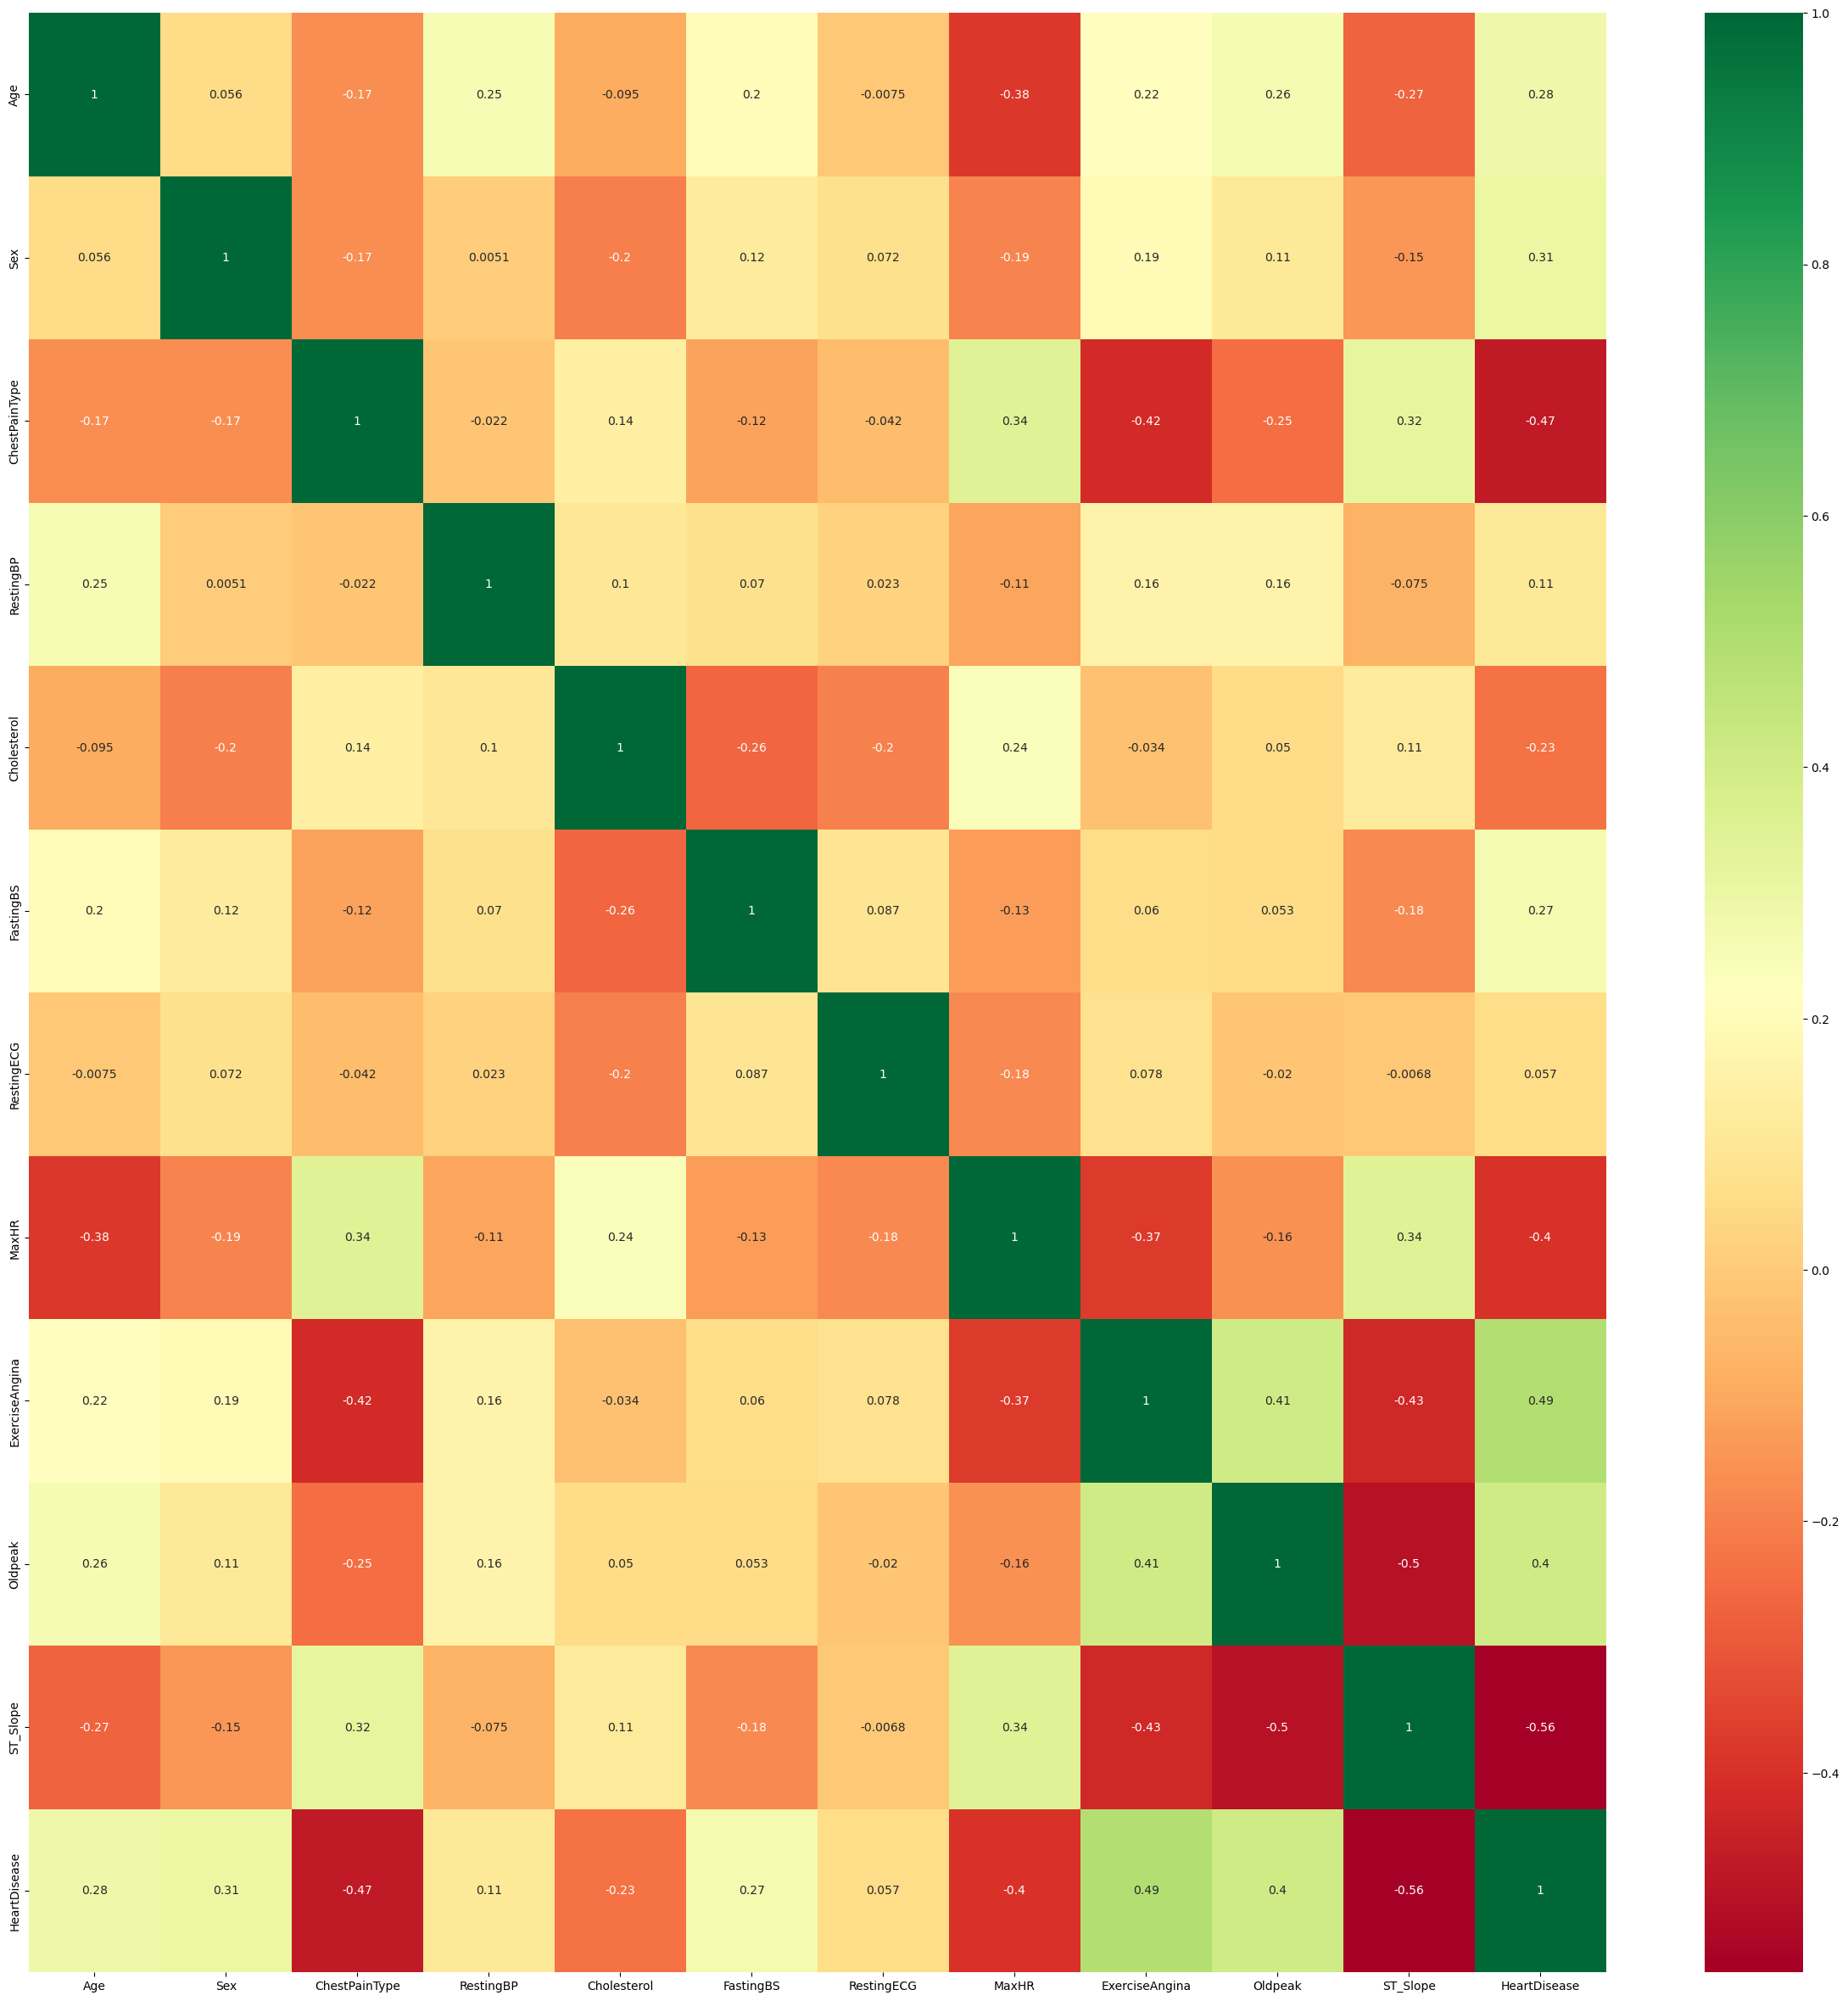

In [72]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})

In [73]:
### Splitting data

In [74]:
x = data.drop('HeartDisease',axis=1)
y = data.HeartDisease

In [75]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [76]:
## train,test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [78]:
y_pred_gb = model_gb.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
accuracy_score(y_test,y_pred_gb)

0.842391304347826

In [81]:
confusion_matrix(y_test,y_pred_gb)

array([[70, 14],
       [15, 85]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        84
           1       0.86      0.85      0.85       100

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [83]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred_xgb = model_xgb.predict(x_test)

In [85]:
accuracy_score(y_test,y_pred_xgb)

0.8586956521739131

In [86]:
confusion_matrix(y_test,y_pred_xgb)

array([[69, 15],
       [11, 89]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        84
           1       0.86      0.89      0.87       100

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [88]:
pd.crosstab(y_test,y_pred_xgb)

col_0,0,1
HeartDisease,,
0,69,15
1,11,89


### Hyperparamater tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'learning_rate':[0.01,0.03,0.06,0.1,0.15,0.2,0.25,0.300000012,0.4,0.5,0.6,0.7],
             'max_depth':[5,6,7,8,9,10,11,12,13,14],
             'n_estimators':[50,65,80,100,115,130,150],
             'reg_alpha':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'reg_lambda':[0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB = XGBClassifier(random_state=30)
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=100,cv=3,
                        verbose=2,random_state=42,n_jobs=-1)

rcv.fit(x_train,y_train)
cv_best_params = rcv.best_params_
print(f"Best parameters:{cv_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters:{'reg_lambda': 0.1, 'reg_alpha': 0.8, 'n_estimators': 80, 'max_depth': 11, 'learning_rate': 0.15, 'gamma': 0.1}


In [90]:
model_xgb_1 = XGBClassifier(reg_lambda=0.1, reg_alpha=0.8, n_estimators=80, max_depth=11, learning_rate=0.15, gamma=0.1,random_state=32)
model_xgb_1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=32, ...)

In [91]:
y_pred_xgb_1 = model_xgb_1.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred_xgb_1)

0.8695652173913043

In [93]:
confusion_matrix(y_test,y_pred_xgb_1)

array([[71, 13],
       [11, 89]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred_xgb_1))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        84
           1       0.87      0.89      0.88       100

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

